In [3]:
# Basic Liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler, LabelEncoder, minmax_scale, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


In [4]:
df = pd.read_csv(r"C:\Users\pc\OneDrive\Music\Desktop\ML_Projects\Dataset\shop_smart_ecommerce_Dataset.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df["Revenue"].value_counts()
df["Revenue"].value_counts(normalize=True) * 100

Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64

In [7]:
df["Weekend"] - df["Weekend"].astype(int)
df["Weekend"] - df["Weekend"].astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Weekend, Length: 12330, dtype: int64

In [8]:
df = pd.get_dummies(
    df,
    columns=["Month", "VisitorType"],
    drop_first=True
)

In [9]:
x = df.drop("Revenue", axis=1)
y = df["Revenue"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Scaling

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [12]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [13]:
# Evalute
y_pred = lr_model.predict(x_test_scaled)

acc = accuracy_score(y_pred, y_test)*100
cr = classification_report(y_pred, y_test)
print("Accuracy_Score", acc)
print("Classification_Report", cr)

Accuracy_Score 88.03730738037308
Classification_Report               precision    recall  f1-score   support

       False       0.98      0.89      0.93      2285
        True       0.35      0.74      0.48       181

    accuracy                           0.88      2466
   macro avg       0.66      0.82      0.70      2466
weighted avg       0.93      0.88      0.90      2466



In [14]:
# RandomForest Model

rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf_model.fit(x_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
# RandomForest Evaluate

y_pred = rf_model.predict(x_test)
acc = accuracy_score(y_pred, y_test)*100
cr = classification_report(y_pred, y_test)

print("Accuracy_Score", acc)
print("Classification_Report", cr)

Accuracy_Score 89.65936739659367
Classification_Report               precision    recall  f1-score   support

       False       0.97      0.91      0.94      2205
        True       0.51      0.74      0.60       261

    accuracy                           0.90      2466
   macro avg       0.74      0.83      0.77      2466
weighted avg       0.92      0.90      0.90      2466



In [16]:
# Confusion Metrix

cm = confusion_matrix(y_pred, y_test)
cm

array([[2017,  188],
       [  67,  194]])

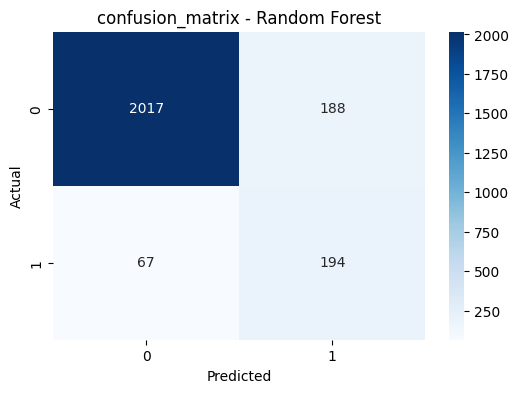

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion_matrix - Random Forest")
plt.show()

In [18]:
# Feature Importance
feature_importance = pd.Series(
    rf_model.feature_importances_, index=x.columns
).sort_values(ascending=False)

feature_importance

PageValues                       0.383251
ExitRates                        0.100560
ProductRelated_Duration          0.093762
ProductRelated                   0.065549
BounceRates                      0.054572
Administrative_Duration          0.050083
Administrative                   0.037587
TrafficType                      0.027466
Month_Nov                        0.026896
Region                           0.025635
Informational_Duration           0.021158
Browser                          0.016563
OperatingSystems                 0.015649
Informational                    0.014590
Month_May                        0.011581
VisitorType_Returning_Visitor    0.010797
Weekend                          0.008514
Month_Mar                        0.007548
Month_Sep                        0.005804
Month_Dec                        0.005786
SpecialDay                       0.005295
Month_Oct                        0.004584
Month_Jul                        0.003844
Month_June                       0